# Support Vector Machines and Kernels

![SVM.png](Assets/SVM.png)

# Learning Objectives

- Apply support vector machines (SVMs)—a popular algorithm used for classification problems
- Recognize SVM similarity to logistic regression
- Compute the cost function of SVMs
- Apply regularization in SVMs and some tips to obtain non-linear classifications with SVMs
- Apply Intel® Extension for Scikit-learn* to leverage underlying compute capabilities of hardware

# scikit-learn* 

Frameworks provide structure that Data Scientists use to build code. Frameworks are more than just libraries, because in addition to callable code, frameworks influence how code is written. 

A main virtue of using an optimized framework is that code runs faster. Code that runs faster is just generally more convenient but when we begin looking at applied data science and AI models, we can see more material benefits. Here you will see how optimization, particularly hyperparameter optimization can benefit more than just speed. 

These exercises will demonstrate how to apply **the Intel® Extension for Scikit-learn*,** a seamless way to speed up your Scikit-learn application. The acceleration is achieved through the use of the Intel® oneAPI Data Analytics Library (oneDAL). Patching is the term used to extend scikit-learn with Intel optimizations and makes it a well-suited machine learning framework for dealing with real-life problems. 

To get optimized versions of many Scikit-learn algorithms using a patch() approach consisting of adding these lines of code PRIOR to importing sklearn: 

- **from sklearnex import patch_sklearn**
- **patch_sklearn()**

## This exercise relies on installation of  Intel® Extension for Scikit-learn*

If you have not already done so, follow the instructions from Week 1 for instructions

## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

In [1]:
from __future__ import print_function
import os
data_path = ['../data']

# from sklearnex import patch_sklearn
# patch_sklearn()

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler


## Question 1

* Import the data.
* Create the target variable `y` as a 1/0 column where 1 means red.
* Create a `pairplot` for the dataset.
* Create a bar plot showing the correlations between each column and `y`
* Pick the most 2 correlated fields (using the absolute value of correlations) and create `X`
* Use MinMaxScaler to scale `X`. Note that this will output a np.array. Make it a DataFrame again and rename the columns appropriately.

In [37]:
import pandas as pd
import numpy as np

# Load the Excel file
df = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')
df.head()


Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness       Class  
0       0.8207  Çerçevelik  
1       0.7487  Çerçevelik  
2       0.6929  Çerçevelik  
3       0.7624  Çerçevelik  
4       0.7557  Çerçevelik

In [38]:
# Basic Info
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# Class distribution
print("\nClass distribution:\n", df['Class'].value_counts())


Shape: (2500, 13)

Columns:
 Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

Data types:
 Area                   int64
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length    float64
Convex_Area            int64
Equiv_Diameter       float64
Eccentricity         float64
Solidity             float64
Extent               float64
Roundness            float64
Aspect_Ration        float64
Compactness          float64
Class                 object
dtype: object

Missing values:
 Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

Cla

In [9]:
y = (data['color'] == 'red').astype(int)
fields = list(data.columns[:-1])  # everything except "color"
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

/opt/anaconda3/envs/practical/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/practical/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


fixed_acidity          NaN
volatile_acidity       NaN
citric_acid            NaN
residual_sugar         NaN
chlorides              NaN
free_sulfur_dioxide    NaN
total_sulfur_dioxide   NaN
density                NaN
pH                     NaN
sulphates              NaN
alcohol                NaN
quality                NaN
dtype: float64

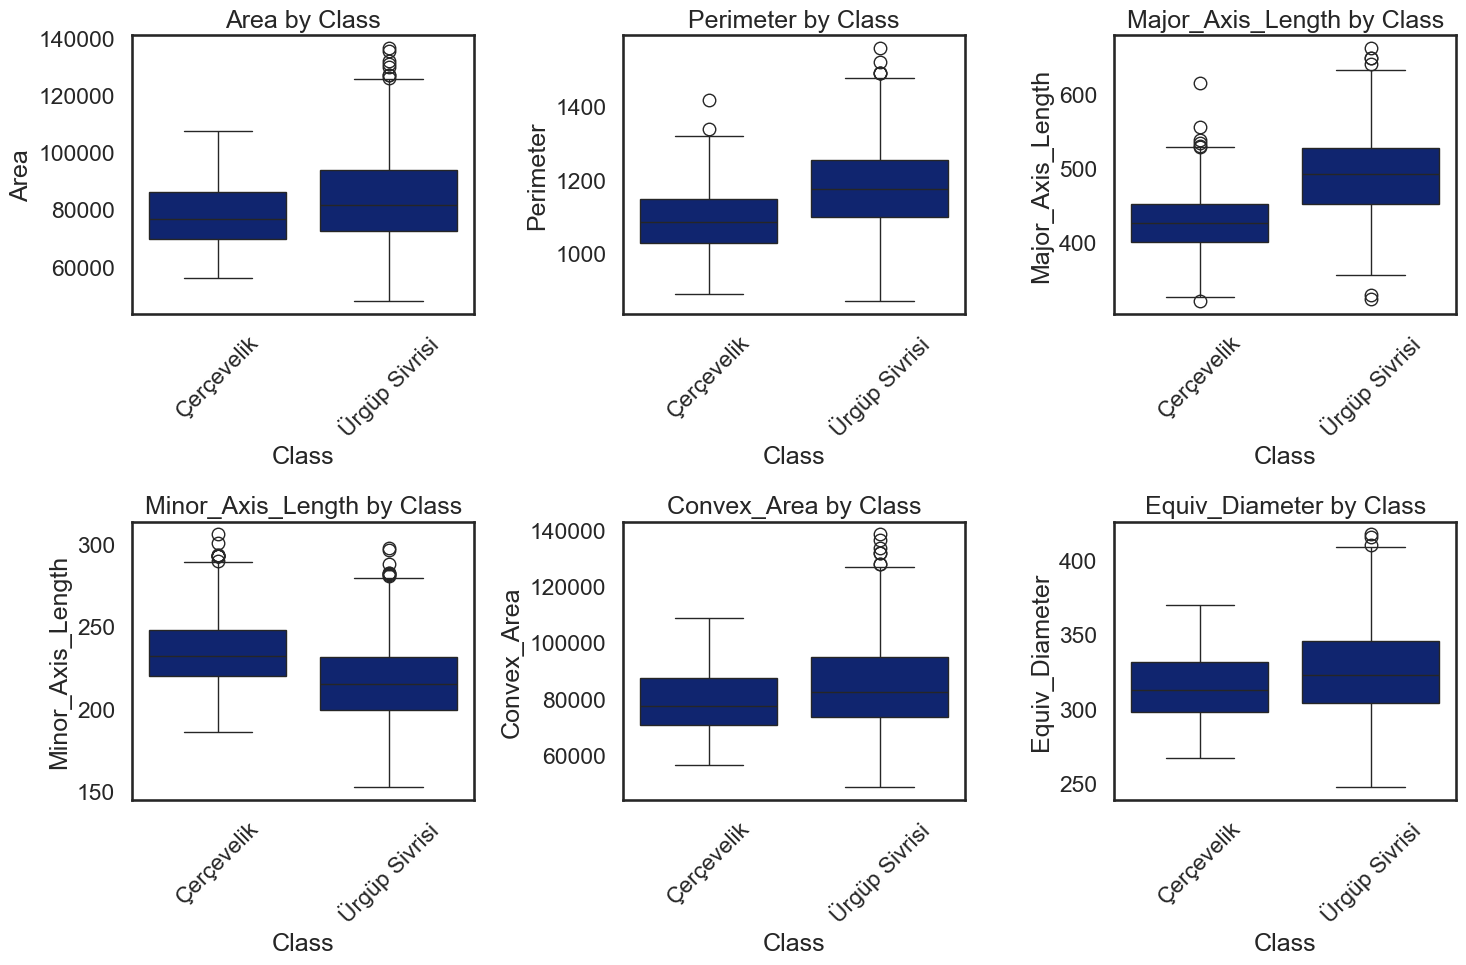

In [43]:
# Visualize boxplots of selected features grouped by Class
import matplotlib.pyplot as plt

features_to_plot = df.columns[:6]  # Select a few features

plt.figure(figsize=(15, 10))
for idx, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, idx + 1)
    sns.boxplot(data=df, x='Class', y=feature)
    plt.title(f'{feature} by Class')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


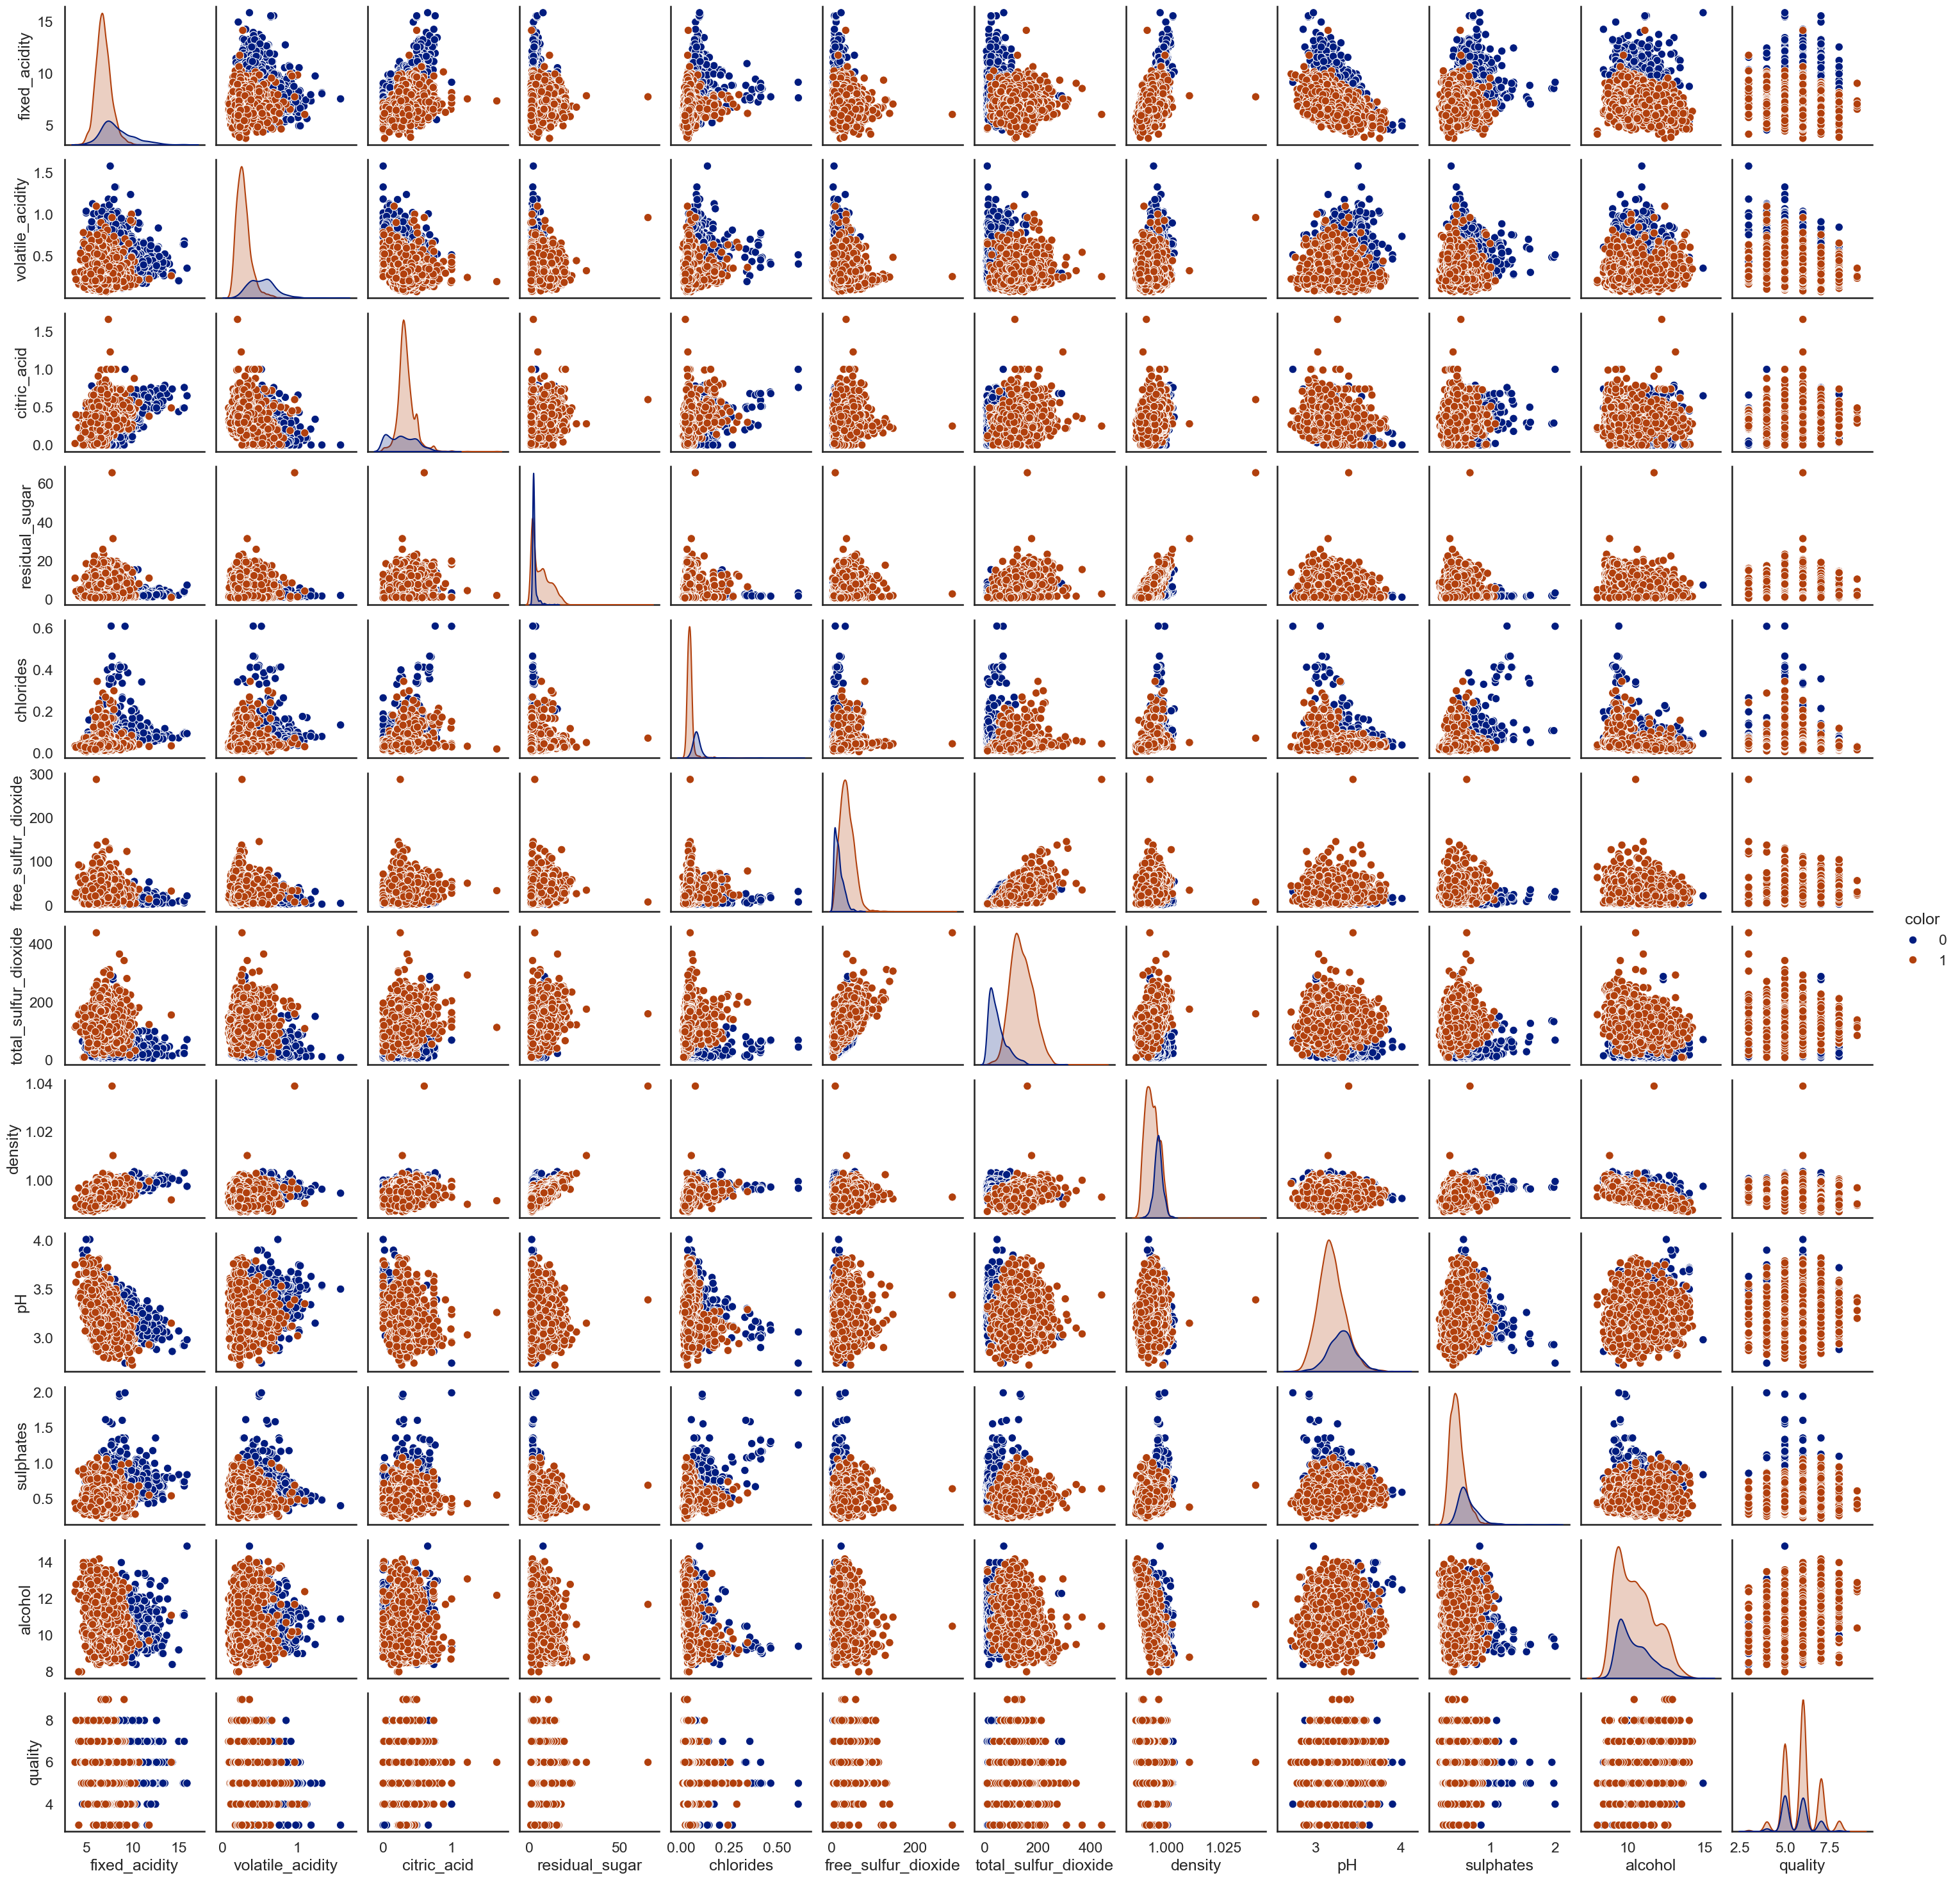

In [11]:
sns.pairplot(data, hue='color')

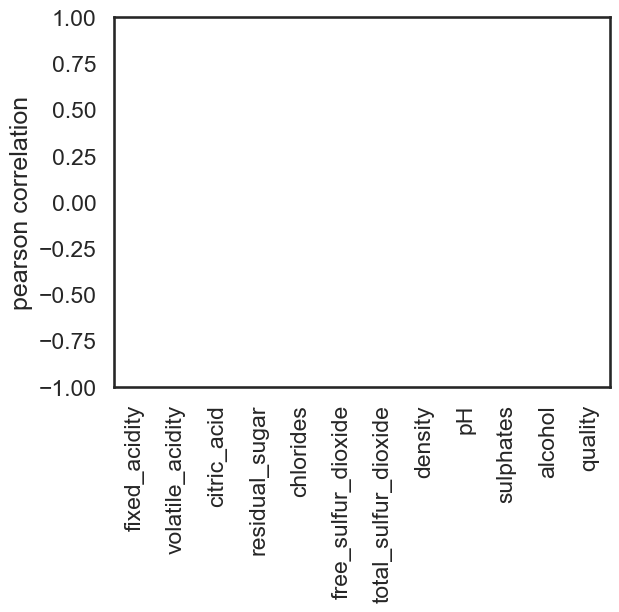

In [12]:
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [13]:
fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)
X = data[fields]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])
print(X.columns)

Index(['alcohol', 'quality'], dtype='object')
Index(['alcohol_scaled', 'quality_scaled'], dtype='object')


## Question 2

The goal for this question is to look at the decision boundary of a LinearSVC classifier on this dataset. Check out [this example](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py) in sklearn's documentation. 

* Fit a Linear Support Vector Machine Classifier to `X`, `y`.
* Pick 300 samples from `X`. Get the corresponding `y` value. Store them in variables `X_color` and `y_color`. This is because original dataset is too large and it produces a crowded plot.
* Modify `y_color` so that it has the value "red" instead of 1 and 'yellow' instead of 0.
* Scatter plot X_color's columns. Use the keyword argument "color=y_color" to color code samples.
* Use the code snippet below to plot the decision surface in a color coded way.

```python
x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = *[YOUR MODEL]*.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
```

Feel free to experiment with different parameter choices for LinearSVC and see the decision boundary.

In [46]:
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Show the unique class labels
df['Class'].unique()


from sklearn.preprocessing import LabelEncoder

# Filter for 2 classes only
df_binary = df[df['Class'].isin(['Çerçevelik', 'Ürgüp Sivrisi'])].copy()

# Encode class labels as 0 and 1
label_encoder = LabelEncoder()
df_binary['Class'] = label_encoder.fit_transform(df_binary['Class'])

X_bin = df_binary.drop('Class', axis=1)
y_bin = df_binary['Class']

# PCA to 2D
pca = PCA(n_components=2)
X_bin_pca = pca.fit_transform(X_bin)

# Fit model
svc = LinearSVC(max_iter=10000)
svc.fit(X_bin_pca, y_bin)



LinearSVC(max_iter=10000)

## Question 3

Let's now fit a Gaussian kernel SVC and see how the decision boundary changes.

* Consolidate the code snippets in Question 2 into one function which takes in an estimator, `X` and `y`, and produces the final plot with decision boundary. The steps are:
    <ol>
     <li> fit model
     <li> get sample 300 records from X and the corresponding y's
     <li> create grid, predict, plot using ax.contourf
     <li> add on the scatter plot
    </ol>
* After copying and pasting code, make sure the finished function uses your input `estimator` and not the LinearSVC model you built.
* For the following values of `gamma`, create a Gaussian Kernel SVC and plot the decision boundary.  
`gammas = [.5, 1, 2, 10]`
* Holding `gamma` constant, for various values of `C`, plot the decision boundary. You may try  
`Cs = [.1, 1, 10]`

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.utils import resample

def plot_decision_boundary(estimator, X, y, title='Decision Boundary'):
    # Reduce to 2D using PCA for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Fit model on PCA-transformed data
    estimator.fit(X_pca, y)

    # Sample 300 data points for scatter plot
    X_sample, y_sample = resample(X_pca, y, n_samples=300, random_state=42)

    # Color mapping
    y_colors = ['red' if label == 1 else 'yellow' for label in y_sample]

    # Create grid to evaluate model
    x_axis, y_axis = np.arange(-3, 3, .01), np.arange(-3, 3, .01)
    xx, yy = np.meshgrid(x_axis, y_axis)
    X_grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict on grid
    y_pred_grid = estimator.predict(X_grid)
    y_pred_grid = y_pred_grid.reshape(xx.shape)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.contourf(xx, yy, y_pred_grid, cmap=plt.cm.autumn_r, alpha=0.3)
    ax.scatter(X_sample[:, 0], X_sample[:, 1], c=y_colors, edgecolor='k')
    ax.set_title(title)
    plt.show()


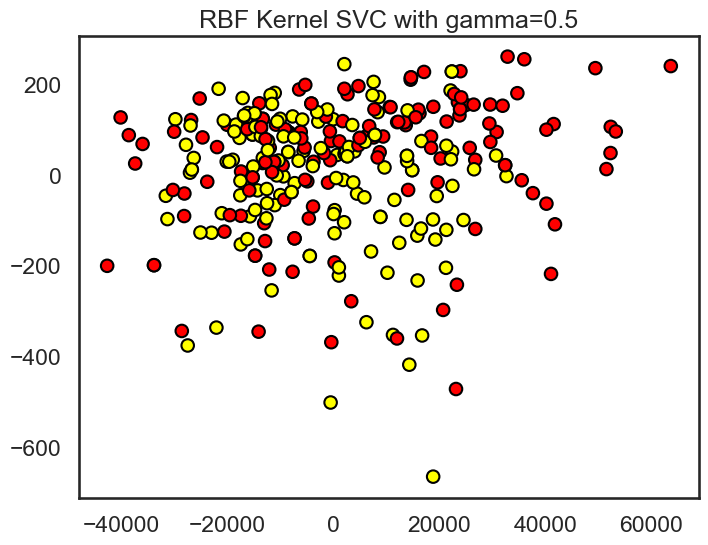

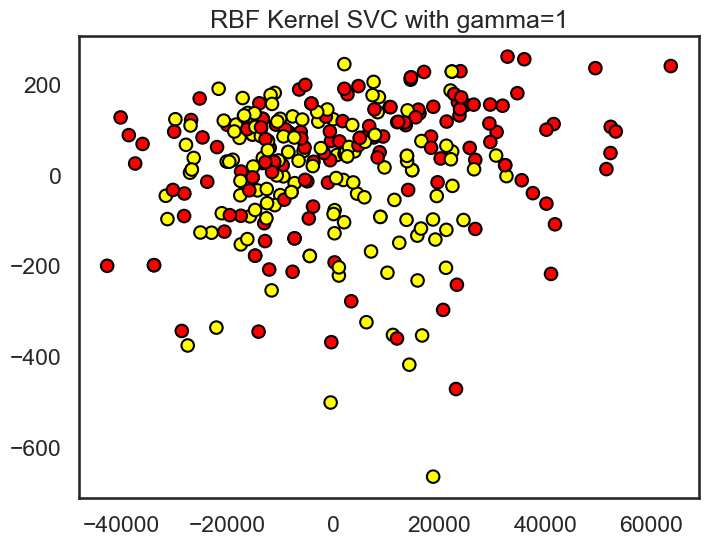

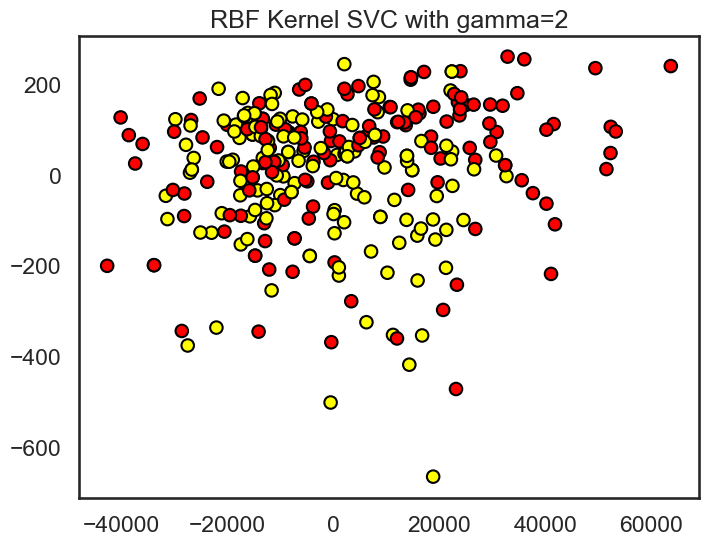

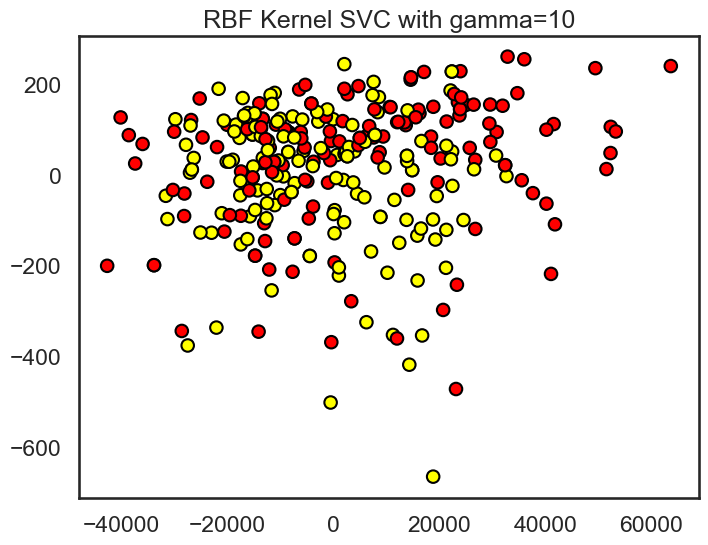

In [48]:
from sklearn.svm import SVC

gammas = [0.5, 1, 2, 10]

for gamma in gammas:
    model = SVC(kernel='rbf', gamma=gamma)
    plot_decision_boundary(model, X_bin, y_bin, title=f'RBF Kernel SVC with gamma={gamma}')


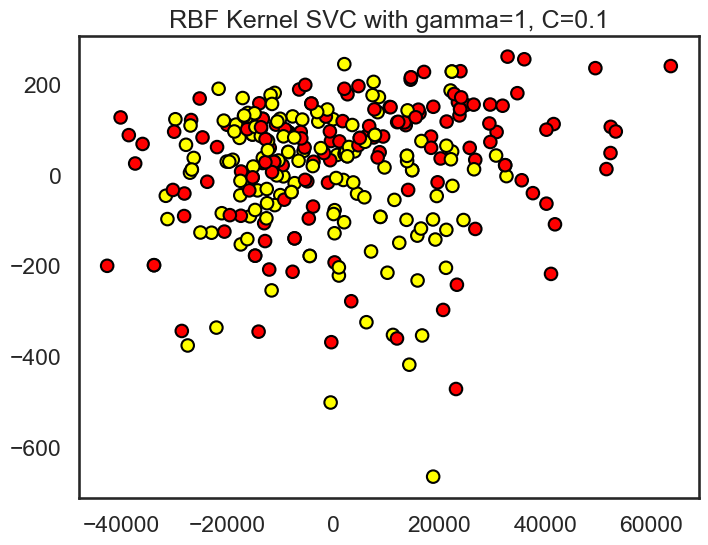

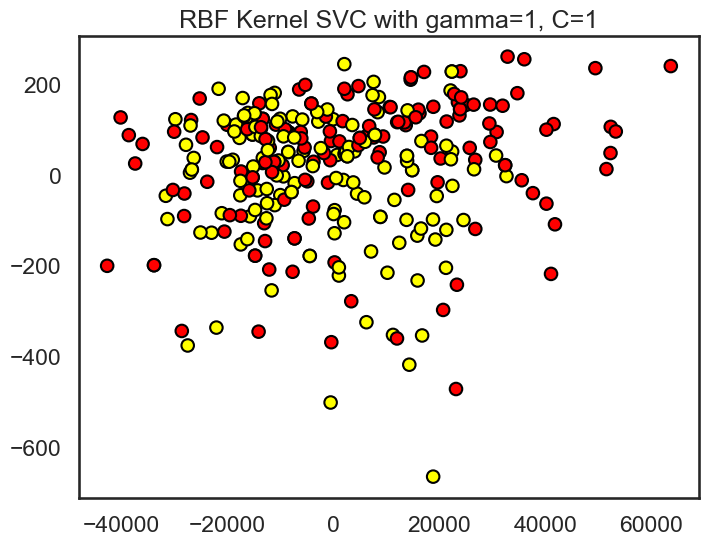

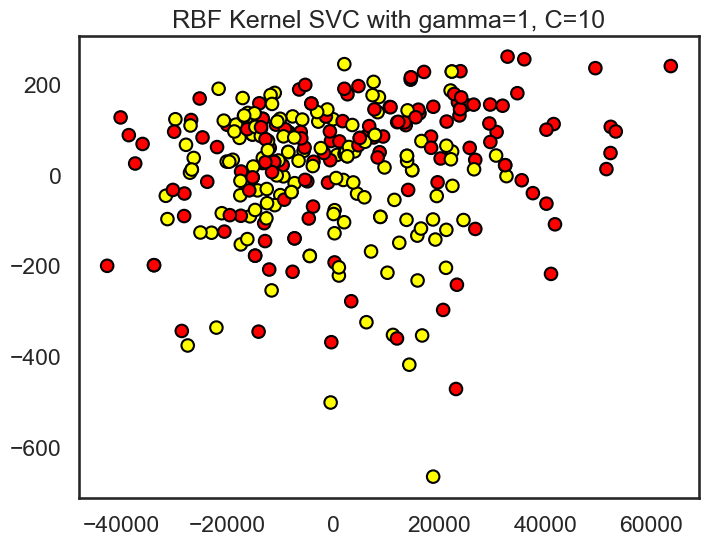

In [49]:
Cs = [0.1, 1, 10]
gamma_fixed = 1  # fixed gamma

for C in Cs:
    model = SVC(kernel='rbf', gamma=gamma_fixed, C=C)
    plot_decision_boundary(model, X_bin, y_bin, title=f'RBF Kernel SVC with gamma={gamma_fixed}, C={C}')


## Question 3A

Let's now fit a Polynomial kernel SVC with degree 3 and see how the decision boundary changes.

* Use the plot decision boundary function from the previous question and try the Polynomial Kernel SVC
* For various values of `C`, plot the decision boundary. You may try  
`Cs = [10,20,100,200]`
* Try to find out a C value that gives the best possible decision boundary

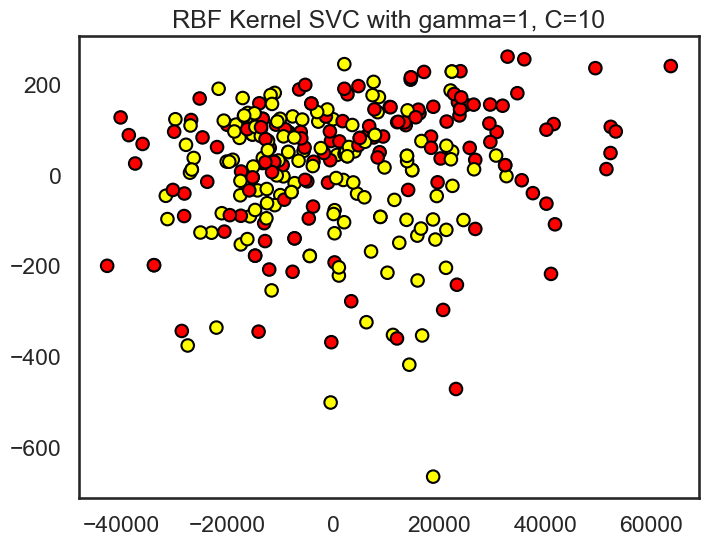

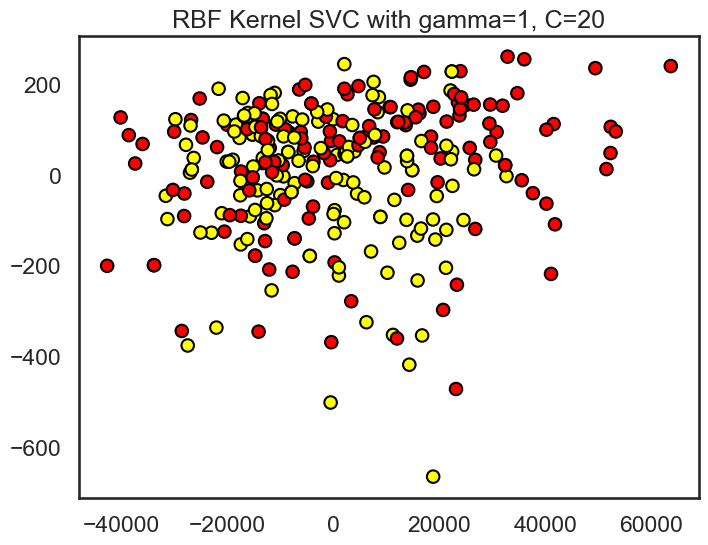

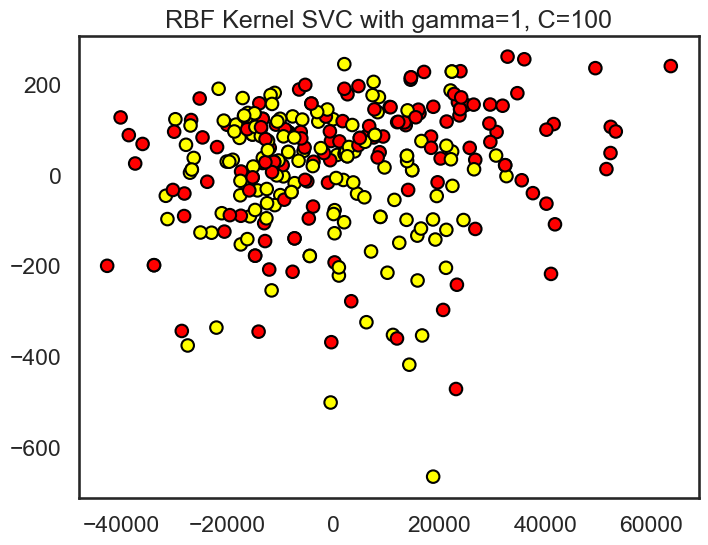

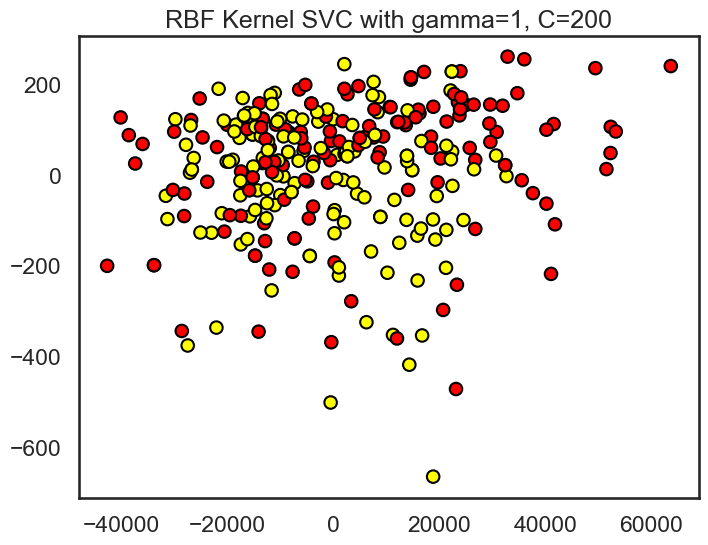

In [50]:
Cs = [10,20,100,200]
gamma_fixed = 1  # fixed gamma

for C in Cs:
    model = SVC(kernel='rbf', gamma=gamma_fixed, C=C)
    plot_decision_boundary(model, X_bin, y_bin, title=f'RBF Kernel SVC with gamma={gamma_fixed}, C={C}')


## Question 4

In this question, we will compare the fitting times between SVC vs Nystroem with rbf kernel.  
<br><br>
Jupyter Notebooks provide a useful magic function **`%timeit`** which executes a line and prints out the time it took to fit. If you type **`%%timeit`** in the beginning of the cell, then it will run the whole cell and output the running time.

* Re-load the wine quality data if you made changes to the original.
* Create `y` from data.color, and `X` from the rest of the columns.
* Use `%%timeit` to get the time for fitting an SVC with rbf kernel.
* Use `%%timeit` to get the time for the following: fit_transform the data with Nystroem and then fit a SGDClassifier.

Nystroem+SGD will take much shorter to fit. This difference will be more pronounced if the dataset was bigger.

* Make 5 copies of X and concatenate them
* Make 5 copies of y and concatenate them
* Compare the time it takes to fit the both methods above

In [52]:
# Reload data from original
df = pd.read_excel("Pumpkin_Seeds_Dataset.xlsx")

# Encode the 'Class' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# Define X and y
X = df.drop(columns=['Class'])
y = df['Class']


In [54]:
# Reload data from original
df = pd.read_excel("Pumpkin_Seeds_Dataset.xlsx")

# Encode the 'Class' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# Define X and y
X = df.drop(columns=['Class'])
y = df['Class']


In [57]:
import time
start_time = time.time()
svc_rbf = SVC(kernel='rbf', gamma='scale')
svc_rbf.fit(X, y)
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


Execution time: 0.1223909854888916 seconds


In [60]:
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Normalize the data to use scale gamma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set gamma to 1 / (n_features * X.var()) for 'scale' behavior
gamma_value = 1 / (X_scaled.shape[1] * X_scaled.var())

# Create the pipeline
nystroem_sgd = make_pipeline(Nystroem(kernel='rbf', gamma=gamma_value, n_components=100), SGDClassifier(max_iter=1000, tol=1e-3))

# Fit the model
import time
start_time = time.time()
nystroem_sgd.fit(X_scaled, y)
end_time = time.time()

print(f"Execution time: {end_time - start_time} seconds")


Execution time: 0.06403708457946777 seconds


In [61]:
import numpy as np

X_big = pd.concat([X]*5, ignore_index=True)
y_big = pd.concat([y]*5, ignore_index=True)


In [27]:
%%timeit
svc_big = SVC(kernel='rbf')
svc_big.fit(X_big, y_big)


481 ms ± 3.56 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Question 5
Try Tuning hyper-parameters for the svm kernal using GridSearchCV

* Take the complete dataset
* Define y as data.color = 'red'
* Remaining columns as X
* Do a test and train split
* Set parameters for cross validation. Do this for as many values of gamma and C
* Using gridsearchcv to run through the data using the various parameters values
* Get the mean and standard deviation on the set for the various combination of gamma and C values
* print the best parameters in the training set

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and inspect
data = pd.read_excel("Pumpkin_Seeds_Dataset.xlsx")

# See what classes are available
print("All classes in dataset:\n", data['Class'].value_counts())

# Replace these with actual values from your dataset!
class_1 = 'Kırmızı'
class_2 = 'Çerçevelik'

# Filter the dataset for only those two classes
filtered_data = data[data['Class'].isin([class_1, class_2])]

# Create binary labels: 1 if class_1, else 0
X = filtered_data.drop(columns=['Class'])
y = (filtered_data['Class'] == class_1).astype(int)

# Show label distribution
print("\nFinal label distribution (should show both 0 and 1):")
print(y.value_counts())

print(data['Class'].unique())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Confirm again
print("\nTrain set label distribution:")
print(pd.Series(y_train).value_counts())



All classes in dataset:
 Class
Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: count, dtype: int64

Final label distribution (should show both 0 and 1):
Class
0    1300
Name: count, dtype: int64
['Çerçevelik' 'Ürgüp Sivrisi']

Train set label distribution:
Class
0    1040
Name: count, dtype: int64


## Question 6
   Use the model from previous question to predict 
 
 * Perform the prediction on the test set  
 * Print confusion matrix, accuracy and classification report

In [75]:
import numpy as np
print("Unique classes in y_train:", np.unique(y_train))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Classes in y_train:", np.unique(y_train))
print("Classes in y_test:", np.unique(y_test))


Unique classes in y_train: [0]
Classes in y_train: [0]
Classes in y_test: [0]


In [78]:
import numpy as np
print("y_train classes:", np.unique(y_train, return_counts=True))
print("y_test classes:", np.unique(y_test, return_counts=True))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("y_train:", np.unique(y_train, return_counts=True))

param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(SVC(), param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred = grid_search.best_estimator_.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


y_train classes: (array([0]), array([1040]))
y_test classes: (array([0]), array([260]))
y_train: (array([0]), array([1040]))


ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/practical/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/practical/lib/python3.11/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/practical/lib/python3.11/site-packages/sklearn/svm/_base.py", line 207, in fit
    y = self._validate_targets(y)
        ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/practical/lib/python3.11/site-packages/sklearn/svm/_base.py", line 751, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one; got 1 class
